## Importing Libraries

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn import metrics

import warnings
warnings.filterwarnings('ignore')

 ### Import data

In [5]:
data = pd.read_csv("Car details v3.csv")

### Data Exploration

In [6]:
data.shape

(8128, 13)

In [7]:
data.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           8128 non-null   object 
 1   year           8128 non-null   int64  
 2   selling_price  8128 non-null   int64  
 3   km_driven      8128 non-null   int64  
 4   fuel           8128 non-null   object 
 5   seller_type    8128 non-null   object 
 6   transmission   8128 non-null   object 
 7   owner          8128 non-null   object 
 8   mileage        7907 non-null   object 
 9   engine         7907 non-null   object 
 10  max_power      7913 non-null   object 
 11  torque         7906 non-null   object 
 12  seats          7907 non-null   float64
dtypes: float64(1), int64(3), object(9)
memory usage: 825.6+ KB


In [9]:
data.nunique()

name             2058
year               29
selling_price     677
km_driven         921
fuel                4
seller_type         3
transmission        2
owner               5
mileage           393
engine            121
max_power         322
torque            441
seats               9
dtype: int64

In [11]:
data.isnull().sum()

name               0
year               0
selling_price      0
km_driven          0
fuel               0
seller_type        0
transmission       0
owner              0
mileage          221
engine           221
max_power        215
torque           222
seats            221
dtype: int64

In [12]:
# Let's convert 'mileage', 'engine' and 'max_power' to float datatype
data['mileage'] = data['mileage'].str.replace("kmpl", '')
data['engine'] = data['engine'].str.replace("CC", '')
data['max_power'] = data['max_power'].str.replace(" bhp", '')

In [14]:
data['mileage'].unique()

array(['23.4 ', '21.14 ', '17.7 ', '23.0 ', '16.1 ', '20.14 ',
       '17.3 km/kg', '23.59 ', '20.0 ', '19.01 ', '17.3 ', '19.3 ', nan,
       '18.9 ', '18.15 ', '24.52 ', '19.7 ', '22.54 ', '21.0 ', '25.5 ',
       '26.59 ', '21.5 ', '20.3 ', '21.4 ', '24.7 ', '18.2 ', '16.8 ',
       '24.3 ', '14.0 ', '18.6 ', '33.44 km/kg', '23.95 ', '17.0 ',
       '20.63 ', '13.93 ', '16.0 ', '17.8 ', '18.5 ', '12.55 ', '12.99 ',
       '14.8 ', '13.5 ', '26.0 ', '20.65 ', '27.3 ', '11.36 ', '17.68 ',
       '14.28 ', '18.53 ', '14.84 ', '21.12 ', '20.36 ', '21.27 ',
       '18.16 ', '22.0 ', '25.1 ', '20.51 ', '21.66 ', '25.2 ', '22.9 ',
       '16.02 ', '20.54 ', '22.77 ', '15.71 ', '23.1 ', '19.02 ',
       '19.81 ', '26.2 km/kg', '16.47 ', '15.04 ', '19.1 ', '21.79 ',
       '18.8 ', '21.21 ', '15.37 ', '11.79 ', '19.0 ', '14.3 ', '15.8 ',
       '15.1 ', '19.09 ', '22.32 ', '21.9 ', '14.53 ', '21.63 ', '20.85 ',
       '20.45 ', '19.67 ', '23.01 ', '20.77 ', '17.92 ', '17.01 ',
       '22.37 

In [17]:
data['mileage'] = data['mileage'].str.replace("km/kg", '')

In [18]:
data['engine'].unique()

array(['1248 ', '1498 ', '1497 ', '1396 ', '1298 ', '1197 ', '1061 ',
       '796 ', '1364 ', '1399 ', '1461 ', '993 ', nan, '1198 ', '1199 ',
       '998 ', '1591 ', '2179 ', '1368 ', '2982 ', '2494 ', '2143 ',
       '2477 ', '1462 ', '2755 ', '1968 ', '1798 ', '1196 ', '1373 ',
       '1598 ', '1998 ', '1086 ', '1194 ', '1172 ', '1405 ', '1582 ',
       '999 ', '2487 ', '1999 ', '3604 ', '2987 ', '1995 ', '1451 ',
       '1969 ', '2967 ', '2497 ', '1797 ', '1991 ', '2362 ', '1493 ',
       '1599 ', '1341 ', '1794 ', '799 ', '1193 ', '2696 ', '1495 ',
       '1186 ', '1047 ', '2498 ', '2956 ', '2523 ', '1120 ', '624 ',
       '1496 ', '1984 ', '2354 ', '814 ', '793 ', '1799 ', '936 ',
       '1956 ', '1997 ', '1499 ', '1948 ', '2997 ', '2489 ', '2499 ',
       '2609 ', '2953 ', '1150 ', '1994 ', '1388 ', '1527 ', '2199 ',
       '995 ', '2993 ', '1586 ', '1390 ', '909 ', '2393 ', '3198 ',
       '1339 ', '2835 ', '2092 ', '1595 ', '2496 ', '1596 ', '1597 ',
       '2596 ', '2148 ', '

In [19]:
data['max_power'].unique()

array(['74', '103.52', '78', '90', '88.2', '81.86', '57.5', '37', '67.1',
       '68.1', '108.45', '60', '73.9', nan, '67', '82', '88.5', '46.3',
       '88.73', '64.1', '98.6', '88.8', '83.81', '83.1', '47.3', '73.8',
       '34.2', '35', '81.83', '40.3', '121.3', '138.03', '160.77',
       '117.3', '116.3', '83.14', '67.05', '168.5', '100', '120.7',
       '98.63', '175.56', '103.25', '171.5', '100.6', '174.33', '187.74',
       '170', '78.9', '88.76', '86.8', '108.495', '108.62', '93.7',
       '103.6', '98.59', '189', '67.04', '68.05', '58.2', '82.85',
       '81.80', '73', '120', '94.68', '160', '65', '155', '69.01',
       '126.32', '138.1', '83.8', '126.2', '98.96', '62.1', '86.7', '188',
       '214.56', '177', '280', '148.31', '254.79', '190', '177.46', '204',
       '141', '117.6', '241.4', '282', '150', '147.5', '108.5', '103.5',
       '183', '181.04', '157.7', '164.7', '91.1', '400', '68', '75',
       '85.8', '87.2', '53', '118', '103.2', '83', '84', '58.16',
       '147.

In [20]:
data['mileage'] = pd.to_numeric(data['mileage'])
data['engine'] = pd.to_numeric(data['engine'])
data['max_power'] = pd.to_numeric(data['max_power'])

In [21]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           8128 non-null   object 
 1   year           8128 non-null   int64  
 2   selling_price  8128 non-null   int64  
 3   km_driven      8128 non-null   int64  
 4   fuel           8128 non-null   object 
 5   seller_type    8128 non-null   object 
 6   transmission   8128 non-null   object 
 7   owner          8128 non-null   object 
 8   mileage        7907 non-null   float64
 9   engine         7907 non-null   float64
 10  max_power      7912 non-null   float64
 11  torque         7906 non-null   object 
 12  seats          7907 non-null   float64
dtypes: float64(4), int64(3), object(6)
memory usage: 825.6+ KB


In [23]:
data['torque'].unique()

array(['190Nm@ 2000rpm', '250Nm@ 1500-2500rpm', '12.7@ 2,700(kgm@ rpm)',
       '22.4 kgm at 1750-2750rpm', '11.5@ 4,500(kgm@ rpm)',
       '113.75nm@ 4000rpm', '7.8@ 4,500(kgm@ rpm)', '59Nm@ 2500rpm',
       '170Nm@ 1800-2400rpm', '160Nm@ 2000rpm', '248Nm@ 2250rpm',
       '78Nm@ 4500rpm', nan, '84Nm@ 3500rpm', '115Nm@ 3500-3600rpm',
       '200Nm@ 1750rpm', '62Nm@ 3000rpm', '219.7Nm@ 1500-2750rpm',
       '114Nm@ 3500rpm', '115Nm@ 4000rpm', '69Nm@ 3500rpm',
       '172.5Nm@ 1750rpm', '6.1kgm@ 3000rpm', '114.7Nm@ 4000rpm',
       '60Nm@ 3500rpm', '90Nm@ 3500rpm', '151Nm@ 4850rpm',
       '104Nm@ 4000rpm', '320Nm@ 1700-2700rpm', '250Nm@ 1750-2500rpm',
       '145Nm@ 4600rpm', '146Nm@ 4800rpm', '343Nm@ 1400-3400rpm',
       '200Nm@ 1400-3400rpm', '200Nm@ 1250-4000rpm',
       '400Nm@ 2000-2500rpm', '138Nm@ 4400rpm', '360Nm@ 1200-3400rpm',
       '200Nm@ 1200-3600rpm', '380Nm@ 1750-2500rpm', '173Nm@ 4000rpm',
       '400Nm@ 1750-3000rpm', '400Nm@ 1400-2800rpm',
       '200Nm@ 1750-3000rp

In [24]:
data.corr()

,year,selling_price,km_driven,mileage,engine,max_power,seats
year,1.000000,0.414092,-0.418006,0.329145,0.018848,0.226320,-0.009144
selling_price,0.414092,1.000000,-0.225534,-0.126054,0.455734,0.748489,0.041358
km_driven,-0.418006,-0.225534,1.000000,-0.173073,0.205914,-0.038075,0.227336
mileage,0.329145,-0.126054,-0.173073,1.000000,-0.575831,-0.374621,-0.452085
engine,0.018848,0.455734,0.205914,-0.575831,1.000000,0.703975,0.610309
max_power,0.226320,0.748489,-0.038075,-0.374621,0.703975,1.000000,0.191999
seats,-0.009144,0.041358,0.227336,-0.452085,0.610309,0.191999,1.000000


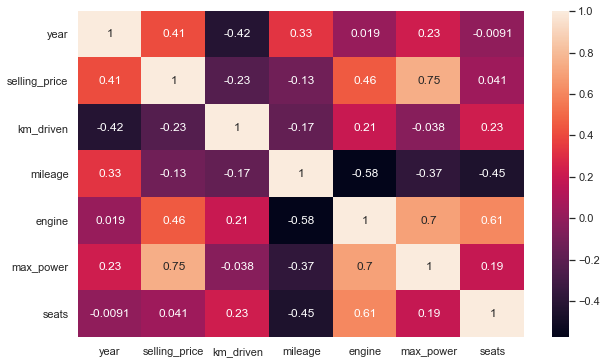

In [27]:
sns.set()
plt.figure(figsize=(10, 6))
sns.heatmap(data.corr(), annot=True)

In [28]:
data.describe()

,year,selling_price,km_driven,mileage,engine,max_power,seats
count,8128.000000,8.128000e+03,8.128000e+03,7907.000000,7907.000000,7912.000000,7907.000000
mean,2013.804011,6.382718e+05,6.981951e+04,19.418783,1458.625016,91.517919,5.416719
std,4.044249,8.062534e+05,5.655055e+04,4.037145,503.916303,35.822499,0.959588
min,1983.000000,2.999900e+04,1.000000e+00,0.000000,624.000000,0.000000,2.000000
25%,2011.000000,2.549990e+05,3.500000e+04,16.780000,1197.000000,68.050000,5.000000
50%,2015.000000,4.500000e+05,6.000000e+04,19.300000,1248.000000,82.000000,5.000000
75%,2017.000000,6.750000e+05,9.800000e+04,22.320000,1582.000000,102.000000,5.000000
max,2020.000000,1.000000e+07,2.360457e+06,42.000000,3604.000000,400.000000,14.000000


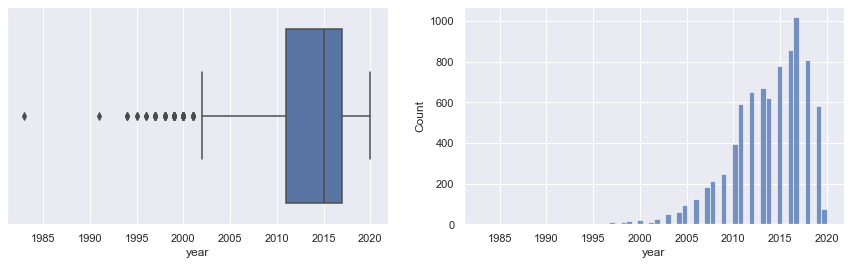

In [41]:
f, axes = plt.subplots(1, 2)
f.set_figwidth(15)
sns.boxplot(data['year'], orient='v', ax = axes[0])
sns.histplot(data['year'], ax=axes[1])

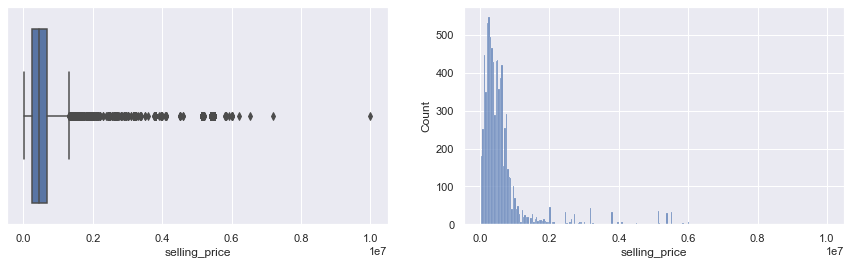

In [42]:
f, axes = plt.subplots(1, 2)
f.set_figwidth(15)
sns.boxplot(data['selling_price'], orient='v', ax = axes[0])
sns.histplot(data['selling_price'], ax=axes[1])

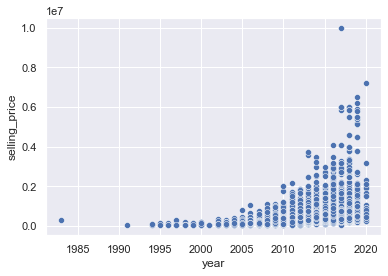

In [43]:
sns.scatterplot(x='year', y='selling_price', data=data)

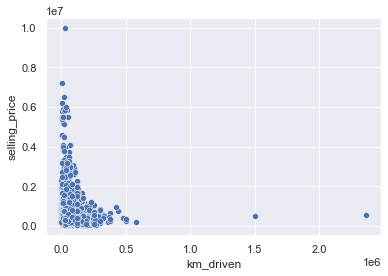

In [44]:
sns.scatterplot(x='km_driven', y='selling_price', data=data)

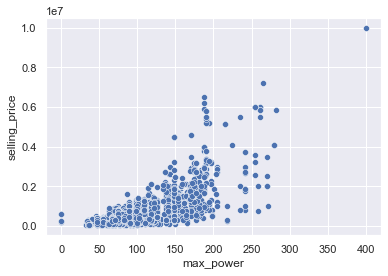

In [45]:
sns.scatterplot(x='max_power', y='selling_price', data=data)

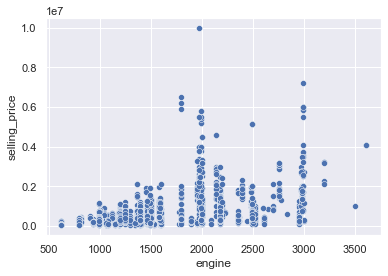

In [46]:
sns.scatterplot(x='engine', y='selling_price', data=data)

### Prepare the data for Linear Regression

In [47]:
data.tail()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
8123,Hyundai i20 Magna,2013,320000,110000,Petrol,Individual,Manual,First Owner,18.50,1197.0,82.85,113.7Nm@ 4000rpm,5.0
8124,Hyundai Verna CRDi SX,2007,135000,119000,Diesel,Individual,Manual,Fourth & Above Owner,16.80,1493.0,110.00,"24@ 1,900-2,750(kgm@ rpm)",5.0
8125,Maruti Swift Dzire ZDi,2009,382000,120000,Diesel,Individual,Manual,First Owner,19.30,1248.0,73.90,190Nm@ 2000rpm,5.0
8126,Tata Indigo CR4,2013,290000,25000,Diesel,Individual,Manual,First Owner,23.57,1396.0,70.00,140Nm@ 1800-3000rpm,5.0
8127,Tata Indigo CR4,2013,290000,25000,Diesel,Individual,Manual,First Owner,23.57,1396.0,70.00,140Nm@ 1800-3000rpm,5.0


In [48]:
df = data.drop(['name', 'torque'], axis = 1)

In [49]:
df.isnull().sum()

year               0
selling_price      0
km_driven          0
fuel               0
seller_type        0
transmission       0
owner              0
mileage          221
engine           221
max_power        216
seats            221
dtype: int64

In [50]:
df['mileage'].describe()

count    7907.000000
mean       19.418783
std         4.037145
min         0.000000
25%        16.780000
50%        19.300000
75%        22.320000
max        42.000000
Name: mileage, dtype: float64

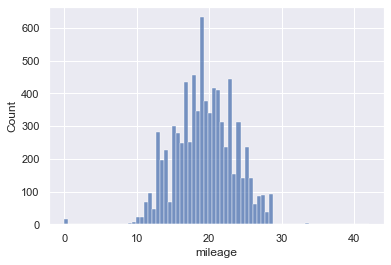

In [51]:
sns.histplot(df['mileage'])

In [53]:
df['mileage'].fillna(df['mileage'].mean(), inplace=True)

In [56]:
df['engine'].describe()

count    7907.000000
mean     1458.625016
std       503.916303
min       624.000000
25%      1197.000000
50%      1248.000000
75%      1582.000000
max      3604.000000
Name: engine, dtype: float64

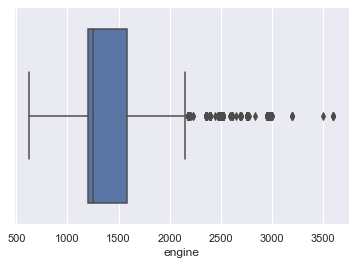

In [57]:
sns.boxplot(df['engine'])

In [65]:
df.dropna(inplace=True)

In [66]:
df.isnull().sum()

year             0
selling_price    0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
mileage          0
engine           0
max_power        0
seats            0
dtype: int64

In [67]:
df.shape

(7906, 11)

In [68]:
df.head()

,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
0,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.40,1248.0,74.00,5.0
1,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498.0,103.52,5.0
2,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.70,1497.0,78.00,5.0
3,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.00,1396.0,90.00,5.0
4,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.10,1298.0,88.20,5.0


In [69]:
df['fuel'].unique()

array(['Diesel', 'Petrol', 'LPG', 'CNG'], dtype=object)

In [72]:
df['fuel'].replace({'Diesel':0, 'Petrol':1, 'LPG':2, 'CNG':3}, inplace=True)

In [73]:
df['seller_type'].unique()

array(['Individual', 'Dealer', 'Trustmark Dealer'], dtype=object)

In [76]:
df['seller_type'].replace({'Individual': 0, 'Dealer': 1, 'Trustmark Dealer':2}, inplace=True)

In [77]:
df['transmission'].unique()

array(['Manual', 'Automatic'], dtype=object)

In [79]:
df['transmission'].replace({'Manual':0, 'Automatic':1}, inplace=True)

In [80]:
df['owner'].unique()

array(['First Owner', 'Second Owner', 'Third Owner',
       'Fourth & Above Owner', 'Test Drive Car'], dtype=object)

In [82]:
df['owner'].replace({'First Owner': 0, 'Second Owner': 1, 'Third Owner':2,
                    'Fourth & Above Owner': 3, 'Test Drive Car': 4}, inplace=True)

In [83]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7906 entries, 0 to 8127
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   year           7906 non-null   int64  
 1   selling_price  7906 non-null   int64  
 2   km_driven      7906 non-null   int64  
 3   fuel           7906 non-null   int64  
 4   seller_type    7906 non-null   int64  
 5   transmission   7906 non-null   int64  
 6   owner          7906 non-null   int64  
 7   mileage        7906 non-null   float64
 8   engine         7906 non-null   float64
 9   max_power      7906 non-null   float64
 10  seats          7906 non-null   float64
dtypes: float64(4), int64(7)
memory usage: 741.2 KB


In [101]:
df.corr()['selling_price']

year             0.412302
selling_price    1.000000
km_driven       -0.222158
fuel            -0.201221
seller_type      0.321389
transmission     0.590269
owner           -0.216514
mileage         -0.126280
engine           0.455682
max_power        0.749674
seats            0.041617
Name: selling_price, dtype: float64

In [84]:
X = df.drop('selling_price', axis=1)
y = df['selling_price']

In [85]:
print(X.shape)
print(y.shape)

(7906, 10)
(7906,)


## Machine Learning

In [102]:
from sklearn.model_selection import train_test_split

In [103]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=2)

In [104]:
lr = LinearRegression()

In [105]:
%time lr.fit(X_train, y_train)

Wall time: 38 ms


LinearRegression()

In [106]:
y_pred = lr.predict(X_test)

In [108]:
metrics.r2_score(y_test, y_pred)

0.6701974270864869

## Ensemble methods

In [114]:
from sklearn.ensemble import GradientBoostingRegressor

In [115]:
gbr = GradientBoostingRegressor()

In [116]:
y_pred = gbr.fit(X_train, y_train).predict(X_test)

In [117]:
metrics.r2_score(y_test, y_pred)

0.9568429155746111

### Saving the model

In [118]:
import pickle

In [120]:
with open('GBR_Regressor.pkl', 'wb') as f:
    pickle.dump(gbr, f)